In [1]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats as stats
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
top200weekly = pd.read_csv("alltopwithfeatures.csv")

In [3]:
playlists = pd.read_csv("allplaylist.csv")

In [4]:
ridemptionwends = pd.read_csv("wendsridem.csv")

In [5]:
playlists["is_in_any_top_200_week"] = np.nan


In [6]:
top200weekly["success"] = 1

In [7]:
ids = top200weekly["id"]

In [8]:
ids = [(i.split("/"))[4] for i in ids]

In [9]:
top200weekly["id"] = ids

In [10]:
playlists

,id,name,popularity,duration,artist,album,release_date,playlist,playlist_id,playlist_category,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,is_in_any_top_200_week
0,5SFXOMJJ334Wn2PwBHeRZN,Girls Like Us,76,189000,Zoe Wees,Girls Like Us,2021-01-12,Top Hits Deutschland,37i9dQZF1DX4jP4eebSWR9,toplists,...,-4.955,1,0.0476,0.28800,0.000000,0.059,0.171,125.706,5,NaN
1,5YaskwnGDZFDRipaqzbwQx,Your Love (9PM),80,150052,ATB,Your Love (9PM),2021-01-15,Top Hits Deutschland,37i9dQZF1DX4jP4eebSWR9,toplists,...,-5.603,1,0.1120,0.19400,0.000006,0.115,0.517,125.993,4,NaN
2,5ri4zqtWhG07hIuNNDWP76,Fly Away,82,178156,Tones And I,Fly Away,2020-11-13,Top Hits Deutschland,37i9dQZF1DX4jP4eebSWR9,toplists,...,-6.208,1,0.0685,0.21700,0.000000,0.217,0.503,124.988,4,NaN
3,46lyJh9GYmWsHez3EsvmAx,Rise Up (feat. Vamero),76,182000,VINAI,Rise Up (feat. Vamero),2020-05-01,Top Hits Deutschland,37i9dQZF1DX4jP4eebSWR9,toplists,...,-3.633,1,0.0488,0.01100,0.000000,0.162,0.359,126.037,4,NaN
4,4hSJUp6k7QeHLxU32MrLIU,Ohne Dich,83,125720,KASIMIR1441,Ohne Dich,2021-01-14,Top Hits Deutschland,37i9dQZF1DX4jP4eebSWR9,toplists,...,-6.519,0,0.3490,0.19100,0.000000,0.125,0.925,156.013,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69362,0JQPxSYL6alc9UvsPvBoFA,Light,45,209510,Wanna One,1÷x=1 (UNDIVIDED),2018-06-04,Workday K-Pop,37i9dQZF1DX5eq3AONkaho,kpop,...,-2.522,0,0.1190,0.21400,0.000000,0.216,0.726,139.932,4,NaN
69363,64GiTdVXuZRKTb7fNJXXGc,BABY BABY,0,246253,WINNER,EXIT : E,2016-02-01,Workday K-Pop,37i9dQZF1DX5eq3AONkaho,kpop,...,-6.179,1,0.0403,0.04900,0.000000,0.337,0.309,179.914,3,NaN
69364,7gr57cYekMWriyJYbT7oZ4,HANN (Alone),62,205820,(G)I-DLE,HANN (Alone),2018-08-14,Workday K-Pop,37i9dQZF1DX5eq3AONkaho,kpop,...,-3.315,0,0.0312,0.05900,0.000000,0.167,0.240,104.971,4,NaN
69365,2ni9U5vu15LUg93jpQ2hNM,Why So Lonely,0,206706,Wonder Girls,Why So Lonely,2016-07-22,Workday K-Pop,37i9dQZF1DX5eq3AONkaho,kpop,...,-5.086,1,0.1330,0.11100,0.000000,0.111,0.809,155.161,4,NaN


In [11]:
categories = pd.get_dummies(playlists['playlist_category'])

In [12]:
categories["number_of_playlists"] = 1

In [13]:
temporal = pd.concat([playlists["id"],categories],axis=1)

In [14]:
temporal = temporal.groupby("id").sum()

In [15]:
playlists

,id,name,popularity,duration,artist,album,release_date,playlist,playlist_id,playlist_category,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,is_in_any_top_200_week
0,5SFXOMJJ334Wn2PwBHeRZN,Girls Like Us,76,189000,Zoe Wees,Girls Like Us,2021-01-12,Top Hits Deutschland,37i9dQZF1DX4jP4eebSWR9,toplists,...,-4.955,1,0.0476,0.28800,0.000000,0.059,0.171,125.706,5,NaN
1,5YaskwnGDZFDRipaqzbwQx,Your Love (9PM),80,150052,ATB,Your Love (9PM),2021-01-15,Top Hits Deutschland,37i9dQZF1DX4jP4eebSWR9,toplists,...,-5.603,1,0.1120,0.19400,0.000006,0.115,0.517,125.993,4,NaN
2,5ri4zqtWhG07hIuNNDWP76,Fly Away,82,178156,Tones And I,Fly Away,2020-11-13,Top Hits Deutschland,37i9dQZF1DX4jP4eebSWR9,toplists,...,-6.208,1,0.0685,0.21700,0.000000,0.217,0.503,124.988,4,NaN
3,46lyJh9GYmWsHez3EsvmAx,Rise Up (feat. Vamero),76,182000,VINAI,Rise Up (feat. Vamero),2020-05-01,Top Hits Deutschland,37i9dQZF1DX4jP4eebSWR9,toplists,...,-3.633,1,0.0488,0.01100,0.000000,0.162,0.359,126.037,4,NaN
4,4hSJUp6k7QeHLxU32MrLIU,Ohne Dich,83,125720,KASIMIR1441,Ohne Dich,2021-01-14,Top Hits Deutschland,37i9dQZF1DX4jP4eebSWR9,toplists,...,-6.519,0,0.3490,0.19100,0.000000,0.125,0.925,156.013,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69362,0JQPxSYL6alc9UvsPvBoFA,Light,45,209510,Wanna One,1÷x=1 (UNDIVIDED),2018-06-04,Workday K-Pop,37i9dQZF1DX5eq3AONkaho,kpop,...,-2.522,0,0.1190,0.21400,0.000000,0.216,0.726,139.932,4,NaN
69363,64GiTdVXuZRKTb7fNJXXGc,BABY BABY,0,246253,WINNER,EXIT : E,2016-02-01,Workday K-Pop,37i9dQZF1DX5eq3AONkaho,kpop,...,-6.179,1,0.0403,0.04900,0.000000,0.337,0.309,179.914,3,NaN
69364,7gr57cYekMWriyJYbT7oZ4,HANN (Alone),62,205820,(G)I-DLE,HANN (Alone),2018-08-14,Workday K-Pop,37i9dQZF1DX5eq3AONkaho,kpop,...,-3.315,0,0.0312,0.05900,0.000000,0.167,0.240,104.971,4,NaN
69365,2ni9U5vu15LUg93jpQ2hNM,Why So Lonely,0,206706,Wonder Girls,Why So Lonely,2016-07-22,Workday K-Pop,37i9dQZF1DX5eq3AONkaho,kpop,...,-5.086,1,0.1330,0.11100,0.000000,0.111,0.809,155.161,4,NaN


In [16]:
temporal

,afro,arab,at_home,blues,caribbean,chill,classical,country,decades,desi,...,rock,romance,roots,sleep,soul,toplists,travel,wellness,workout,number_of_playlists
id,,,,,,,,,,,,,,,,,,,,,
000tG7ZCNMDFLzIxobVSUZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
000u1dTg7y1XCDXi80hbBX,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
001AtqHBv2Pmnfkd4D1fDe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
004OSCpetjM9yvyptALSea,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
00591zbq7tnVjtUWwAv2l4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7zx1i0jGcFwMBurajgKlO7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
7zxNy5zBGGh8avoNcoWQMH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
7zzaZggdFuadOs0R7SuJlp,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [17]:
data = playlists.drop_duplicates(subset="id", keep="first")
data

,id,name,popularity,duration,artist,album,release_date,playlist,playlist_id,playlist_category,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,is_in_any_top_200_week
0,5SFXOMJJ334Wn2PwBHeRZN,Girls Like Us,76,189000,Zoe Wees,Girls Like Us,2021-01-12,Top Hits Deutschland,37i9dQZF1DX4jP4eebSWR9,toplists,...,-4.955,1,0.0476,0.28800,0.000000,0.059,0.171,125.706,5,NaN
1,5YaskwnGDZFDRipaqzbwQx,Your Love (9PM),80,150052,ATB,Your Love (9PM),2021-01-15,Top Hits Deutschland,37i9dQZF1DX4jP4eebSWR9,toplists,...,-5.603,1,0.1120,0.19400,0.000006,0.115,0.517,125.993,4,NaN
2,5ri4zqtWhG07hIuNNDWP76,Fly Away,82,178156,Tones And I,Fly Away,2020-11-13,Top Hits Deutschland,37i9dQZF1DX4jP4eebSWR9,toplists,...,-6.208,1,0.0685,0.21700,0.000000,0.217,0.503,124.988,4,NaN
3,46lyJh9GYmWsHez3EsvmAx,Rise Up (feat. Vamero),76,182000,VINAI,Rise Up (feat. Vamero),2020-05-01,Top Hits Deutschland,37i9dQZF1DX4jP4eebSWR9,toplists,...,-3.633,1,0.0488,0.01100,0.000000,0.162,0.359,126.037,4,NaN
4,4hSJUp6k7QeHLxU32MrLIU,Ohne Dich,83,125720,KASIMIR1441,Ohne Dich,2021-01-14,Top Hits Deutschland,37i9dQZF1DX4jP4eebSWR9,toplists,...,-6.519,0,0.3490,0.19100,0.000000,0.125,0.925,156.013,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69362,0JQPxSYL6alc9UvsPvBoFA,Light,45,209510,Wanna One,1÷x=1 (UNDIVIDED),2018-06-04,Workday K-Pop,37i9dQZF1DX5eq3AONkaho,kpop,...,-2.522,0,0.1190,0.21400,0.000000,0.216,0.726,139.932,4,NaN
69363,64GiTdVXuZRKTb7fNJXXGc,BABY BABY,0,246253,WINNER,EXIT : E,2016-02-01,Workday K-Pop,37i9dQZF1DX5eq3AONkaho,kpop,...,-6.179,1,0.0403,0.04900,0.000000,0.337,0.309,179.914,3,NaN
69364,7gr57cYekMWriyJYbT7oZ4,HANN (Alone),62,205820,(G)I-DLE,HANN (Alone),2018-08-14,Workday K-Pop,37i9dQZF1DX5eq3AONkaho,kpop,...,-3.315,0,0.0312,0.05900,0.000000,0.167,0.240,104.971,4,NaN
69365,2ni9U5vu15LUg93jpQ2hNM,Why So Lonely,0,206706,Wonder Girls,Why So Lonely,2016-07-22,Workday K-Pop,37i9dQZF1DX5eq3AONkaho,kpop,...,-5.086,1,0.1330,0.11100,0.000000,0.111,0.809,155.161,4,NaN


In [18]:
df_songs = pd.merge(data, temporal, on="id")

In [19]:
for i in df_songs["id"]:
    if i in list(top200weekly["id"]):
        df_songs["is_in_any_top_200_week"].loc[df_songs["id"]==i] = 1

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [20]:
df_songs = df_songs.drop(["playlist_id", "playlist_category", "playlist"],axis=1)

In [21]:
df_songs["is_in_any_top_200_week"] = df_songs["is_in_any_top_200_week"].fillna(value=0)

In [22]:
df_songs

,id,name,popularity,duration,artist,album,release_date,danceability,energy,key,...,rock,romance,roots,sleep,soul,toplists,travel,wellness,workout,number_of_playlists
0,5SFXOMJJ334Wn2PwBHeRZN,Girls Like Us,76,189000,Zoe Wees,Girls Like Us,2021-01-12,0.444,0.648,1,...,0,0,0,0,0,2,0,0,0,4
1,5YaskwnGDZFDRipaqzbwQx,Your Love (9PM),80,150052,ATB,Your Love (9PM),2021-01-15,0.669,0.784,7,...,0,0,0,0,0,4,0,0,4,14
2,5ri4zqtWhG07hIuNNDWP76,Fly Away,82,178156,Tones And I,Fly Away,2020-11-13,0.806,0.513,4,...,0,0,0,0,0,2,0,0,0,2
3,46lyJh9GYmWsHez3EsvmAx,Rise Up (feat. Vamero),76,182000,VINAI,Rise Up (feat. Vamero),2020-05-01,0.648,0.926,1,...,0,0,0,0,0,3,0,0,0,3
4,4hSJUp6k7QeHLxU32MrLIU,Ohne Dich,83,125720,KASIMIR1441,Ohne Dich,2021-01-14,0.807,0.535,11,...,0,0,0,0,0,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36133,0JQPxSYL6alc9UvsPvBoFA,Light,45,209510,Wanna One,1÷x=1 (UNDIVIDED),2018-06-04,0.683,0.929,1,...,0,0,0,0,0,0,0,0,0,1
36134,64GiTdVXuZRKTb7fNJXXGc,BABY BABY,0,246253,WINNER,EXIT : E,2016-02-01,0.536,0.530,0,...,0,0,0,0,0,0,0,0,0,1
36135,7gr57cYekMWriyJYbT7oZ4,HANN (Alone),62,205820,(G)I-DLE,HANN (Alone),2018-08-14,0.709,0.718,6,...,0,0,0,0,0,0,0,0,0,1
36136,2ni9U5vu15LUg93jpQ2hNM,Why So Lonely,0,206706,Wonder Girls,Why So Lonely,2016-07-22,0.634,0.726,7,...,0,0,0,0,0,0,0,0,0,1


In [36]:
df_canciones = df_songs.copy()

In [33]:
catcat = list(categories.columns)
catcat.remove("number_of_playlists")
catcat

['afro',
 'arab',
 'at_home',
 'blues',
 'caribbean',
 'chill',
 'classical',
 'country',
 'decades',
 'desi',
 'dinner',
 'edm_dance',
 'family',
 'focus',
 'funk',
 'gaming',
 'hiphop',
 'indie_alt',
 'instrumental',
 'jazz',
 'kpop',
 'latin',
 'metal',
 'mood',
 'party',
 'pop',
 'punk',
 'rnb',
 'rock',
 'romance',
 'roots',
 'sleep',
 'soul',
 'toplists',
 'travel',
 'wellness',
 'workout']

In [38]:
for i in catcat:
    df_canciones[i].loc[df_canciones[i] >1 ] = 1

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [47]:
df_canciones

,id,name,popularity,duration,artist,album,release_date,danceability,energy,key,...,rock,romance,roots,sleep,soul,toplists,travel,wellness,workout,number_of_playlists
0,5SFXOMJJ334Wn2PwBHeRZN,Girls Like Us,76,189000,Zoe Wees,Girls Like Us,2021-01-12,0.444,0.648,1,...,0,0,0,0,0,1,0,0,0,4
1,5YaskwnGDZFDRipaqzbwQx,Your Love (9PM),80,150052,ATB,Your Love (9PM),2021-01-15,0.669,0.784,7,...,0,0,0,0,0,1,0,0,1,14
2,5ri4zqtWhG07hIuNNDWP76,Fly Away,82,178156,Tones And I,Fly Away,2020-11-13,0.806,0.513,4,...,0,0,0,0,0,1,0,0,0,2
3,46lyJh9GYmWsHez3EsvmAx,Rise Up (feat. Vamero),76,182000,VINAI,Rise Up (feat. Vamero),2020-05-01,0.648,0.926,1,...,0,0,0,0,0,1,0,0,0,3
4,4hSJUp6k7QeHLxU32MrLIU,Ohne Dich,83,125720,KASIMIR1441,Ohne Dich,2021-01-14,0.807,0.535,11,...,0,0,0,0,0,1,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36133,0JQPxSYL6alc9UvsPvBoFA,Light,45,209510,Wanna One,1÷x=1 (UNDIVIDED),2018-06-04,0.683,0.929,1,...,0,0,0,0,0,0,0,0,0,1
36134,64GiTdVXuZRKTb7fNJXXGc,BABY BABY,0,246253,WINNER,EXIT : E,2016-02-01,0.536,0.530,0,...,0,0,0,0,0,0,0,0,0,1
36135,7gr57cYekMWriyJYbT7oZ4,HANN (Alone),62,205820,(G)I-DLE,HANN (Alone),2018-08-14,0.709,0.718,6,...,0,0,0,0,0,0,0,0,0,1
36136,2ni9U5vu15LUg93jpQ2hNM,Why So Lonely,0,206706,Wonder Girls,Why So Lonely,2016-07-22,0.634,0.726,7,...,0,0,0,0,0,0,0,0,0,1


In [42]:
top200weekly = top200weekly.drop(["fechas"], axis=1)

In [45]:
top200weekly = top200weekly.drop(["success"], axis=1)

In [46]:
top200weekly

,id,name,popularity,duration,artist,album,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,7lPN2DXiMsVn7XUKtOW1CS,drivers license,100,242013,Olivia Rodrigo,drivers license,2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4
1,4MzXwWMhyBbmu6hOcLVD49,DÁKITI,89,205090,Bad Bunny,EL ÚLTIMO TOUR DEL MUNDO,2020-11-27,0.731,0.573,4,-10.059,0,0.0544,0.40100,0.000052,0.1130,0.145,109.928,4
2,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,95,200040,The Weeknd,After Hours,2020-03-20,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4
3,5QO79kh1waicV47BqGRL3g,Save Your Tears,93,215626,The Weeknd,After Hours,2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4
4,3tjFYV6RSFtuktYl3ZtYcq,Mood (feat. iann dior),94,140525,24kGoldn,Mood (feat. iann dior),2020-07-24,0.700,0.722,7,-3.558,0,0.0369,0.22100,0.000000,0.2720,0.756,90.989,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42395,19a3JfW8BQwqHWUMbcqSx8,Famous,70,196040,Kanye West,The Life Of Pablo,2016-06-10,0.465,0.735,6,-3.715,1,0.1170,0.07110,0.000000,0.0975,0.409,173.935,4
42396,2q6tgiA9tpb6DMguABwCWE,All of Me,0,269560,John Legend,Love In The Future (Special Edition),2013,0.422,0.264,8,-7.064,1,0.0322,0.92200,0.000000,0.1320,0.331,119.930,4
42397,494OU6M7NOf4ICYb4zWCf5,Sugar,61,235493,Maroon 5,V (Deluxe),2015-05-18,0.748,0.788,1,-7.055,1,0.0334,0.05910,0.000000,0.0863,0.884,120.076,4
42398,2jyjhRf6DVbMPU5zxagN2h,Let Her Go,67,252866,Passenger,All The Little Lights,2012,0.509,0.538,7,-7.335,1,0.0572,0.38500,0.000000,0.1040,0.244,75.089,4


In [54]:
allsongs = pd.concat([df_canciones, top200weekly,], axis=0)

In [55]:
allsongs = allsongs.reset_index(drop=True)

In [56]:
allsongs = allsongs.drop_duplicates(subset="id", keep="first")

In [57]:
allsongs = allsongs.reset_index(drop=True)

In [60]:
allsongs = allsongs.fillna(value=0)

In [73]:
allsongs.to_csv("definitivo.csv")

In [62]:
allsongs['release_date'] = pd.to_datetime(allsongs['release_date'])
allsongs["release_date_value"]= pd.to_datetime("today")
allsongs["release_date_value"]= allsongs["release_date_value"]-allsongs['release_date']
allsongs["release_date_value"]= pd.to_numeric(allsongs['release_date'])
allsongs

,id,name,popularity,duration,artist,album,release_date,danceability,energy,key,...,romance,roots,sleep,soul,toplists,travel,wellness,workout,number_of_playlists,release_date_value
0,5SFXOMJJ334Wn2PwBHeRZN,Girls Like Us,76,189000,Zoe Wees,Girls Like Us,2021-01-12,0.444,0.648,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1610409600000000000
1,5YaskwnGDZFDRipaqzbwQx,Your Love (9PM),80,150052,ATB,Your Love (9PM),2021-01-15,0.669,0.784,7,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,14.0,1610668800000000000
2,5ri4zqtWhG07hIuNNDWP76,Fly Away,82,178156,Tones And I,Fly Away,2020-11-13,0.806,0.513,4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1605225600000000000
3,46lyJh9GYmWsHez3EsvmAx,Rise Up (feat. Vamero),76,182000,VINAI,Rise Up (feat. Vamero),2020-05-01,0.648,0.926,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1588291200000000000
4,4hSJUp6k7QeHLxU32MrLIU,Ohne Dich,83,125720,KASIMIR1441,Ohne Dich,2021-01-14,0.807,0.535,11,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1610582400000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39358,5Fim1gaXBgsiFfsQAfQSDS,Hasta el Amanecer,68,198706,Nicky Jam,Fénix,2017-01-20,0.832,0.608,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1484870400000000000
39359,2FiSTH0GYpIioUgjfzMIja,Stay (feat. Maty Noyes),60,239465,Kygo,Cloud Nine,2016-05-13,0.648,0.736,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1463097600000000000
39360,19a3JfW8BQwqHWUMbcqSx8,Famous,70,196040,Kanye West,The Life Of Pablo,2016-06-10,0.465,0.735,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465516800000000000
39361,494OU6M7NOf4ICYb4zWCf5,Sugar,61,235493,Maroon 5,V (Deluxe),2015-05-18,0.748,0.788,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1431907200000000000


In [64]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(allsongs[['tempo', 'key', 'duration','loudness', 'popularity',"release_date_value"]]) 
allsongs[['tempo', 'key', 'duration','loudness', 'popularity', "release_date_value"]] = scaled_values

In [120]:
allsongs.loc[allsongs["is_in_any_top_200_week"] ==0 ]

,id,name,popularity,duration,artist,album,release_date,danceability,energy,key,...,romance,roots,sleep,soul,toplists,travel,wellness,workout,number_of_playlists,release_date_value
0,5SFXOMJJ334Wn2PwBHeRZN,Girls Like Us,0.76,0.042301,Zoe Wees,Girls Like Us,2021-01-12,0.444,0.648,0.090909,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.999130
3,46lyJh9GYmWsHez3EsvmAx,Rise Up (feat. Vamero),0.76,0.040658,VINAI,Rise Up (feat. Vamero),2020-05-01,0.648,0.926,0.090909,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.991175
5,0Cnb8XdGDMHAmIRBUJMkIS,Where The Lights Are Low,0.71,0.030099,Toby Romeo,Where The Lights Are Low,2021-01-22,0.759,0.807,0.727273,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.0,0.999441
6,19LqJBBfd73oeBc3CPgDdl,Lost (feat. TOPIC42),0.77,0.030810,Samra,Lost (feat. TOPIC42),2020-12-10,0.658,0.843,0.909091,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.998104
9,1lcmuqFzLwI595hs4uOrnD,Rapkiller,0.68,0.031439,Kool Savas,Rapkiller,2021-01-29,0.701,0.659,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.999658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39358,5Fim1gaXBgsiFfsQAfQSDS,Hasta el Amanecer,0.68,0.044578,Nicky Jam,Fénix,2017-01-20,0.832,0.608,0.545455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.953979
39359,2FiSTH0GYpIioUgjfzMIja,Stay (feat. Maty Noyes),0.60,0.054141,Kygo,Cloud Nine,2016-05-13,0.648,0.736,0.727273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.946148
39360,19a3JfW8BQwqHWUMbcqSx8,Famous,0.70,0.043952,Kanye West,The Life Of Pablo,2016-06-10,0.465,0.735,0.545455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.947018
39361,494OU6M7NOf4ICYb4zWCf5,Sugar,0.61,0.053209,Maroon 5,V (Deluxe),2015-05-18,0.748,0.788,0.090909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.934931


In [77]:
allsongs.columns

Index(['id', 'name', 'popularity', 'duration', 'artist', 'album',
       'release_date', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'is_in_any_top_200_week', 'afro',
       'arab', 'at_home', 'blues', 'caribbean', 'chill', 'classical',
       'country', 'decades', 'desi', 'dinner', 'edm_dance', 'family', 'focus',
       'funk', 'gaming', 'hiphop', 'indie_alt', 'instrumental', 'jazz', 'kpop',
       'latin', 'metal', 'mood', 'party', 'pop', 'punk', 'rnb', 'rock',
       'romance', 'roots', 'sleep', 'soul', 'toplists', 'travel', 'wellness',
       'workout', 'number_of_playlists', 'release_date_value'],
      dtype='object')

In [80]:
import statsmodels.api as sm
x = allsongs[['duration', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'is_in_any_top_200_week', 'afro',
       'arab', 'at_home', 'blues', 'caribbean', 'chill', 'classical',
       'country', 'decades', 'desi', 'dinner', 'edm_dance', 'family', 'focus',
       'funk', 'gaming', 'hiphop', 'indie_alt', 'instrumental', 'jazz', 'kpop',
       'latin', 'metal', 'mood', 'party', 'pop', 'punk', 'rnb', 'rock',
       'romance', 'roots', 'sleep', 'soul', 'toplists', 'travel', 'wellness',
       'workout', 'number_of_playlists', 'release_date_value']]
y = allsongs["popularity"]
x = sm.add_constant(x)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     177.1
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:32:07   Log-Likelihood:                 7044.7
No. Observations:               39363   AIC:                        -1.398e+04
Df Residuals:                   39309   BIC:                        -1.352e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2844      0.020     14.325      0.000       0.246       0.323
duration                  -0.5950      0.036    -16.335      0.000      -0.666      -0.524
danceability               0.0994      0.008     12.035      0.000       0.083       0.116
energy                    -0.0529      0.009     -5.812      0.000      -0.071      -0.035
key                        0.0037      0.003      1.152      0.249      -0.003       0.010
loudness                   0.1684      0.021      7.906      0.000       0.127       0.210
mode                      -0.0019      0.002     -0.867      0.386      -0.006       0.002
speechiness                0.0197      0.012      1.593      0.111      -0.005       0.044
acousticness              -0.0086      0.005     -1.696      0.090      -0.018       0.001
instrumentalness          -0.0041      0.005     -0.895      0.371      -0.013       0.005
liveness                  -0.0306      0.008     -3.911      0.000      -0.046      -0.015
valence                   -0.0457      0.006     -8.003      0.000      -0.057      -0.034
tempo                     -0.0005      0.008     -0.054      0.957      -0.017       0.016
time_signature             0.0017      0.002      0.746      0.456      -0.003       0.006
is_in_any_top_200_week     0.1856      0.007     25.069      0.000       0.171       0.200
afro                      -0.1753      0.005    -33.368      0.000      -0.186      -0.165
arab                      -0.2030      0.007    -30.662      0.000      -0.216      -0.190
at_home                    0.0355      0.006      5.465      0.000       0.023       0.048
blues                     -0.0813      0.026     -3.073      0.002      -0.133      -0.029
caribbean                 -0.1693      0.006    -26.054      0.000      -0.182      -0.157
chill                     -0.1074      0.007    -15.482      0.000      -0.121      -0.094
classical                 -0.1574      0.006    -26.467      0.000      -0.169      -0.146
country                   -0.0781      0.007    -10.864      0.000      -0.092      -0.064
decades                   -0.0374      0.005     -7.548      0.000      -0.047      -0.028
desi                      -0.1562      0.005    -29.157      0.000      -0.167      -0.146
dinner                    -0.1516      0.009    -17.594      0.000      -0.169      -0.135
edm_dance                 -0.1692      0.007    -24.411      0.000      -0.183      -0.156
family                    -0.1376      0.007    -18.412      0.000      -0.152      -0.123
focus                     -0.0506      0.008     -6.161      0.000      -0.067      -0.034
funk                      -0.1208      0.011    -10.563      0.000      -0.143      -0.098
gaming                    -0.1149      0.011    -10.419      0.000      -0.136  

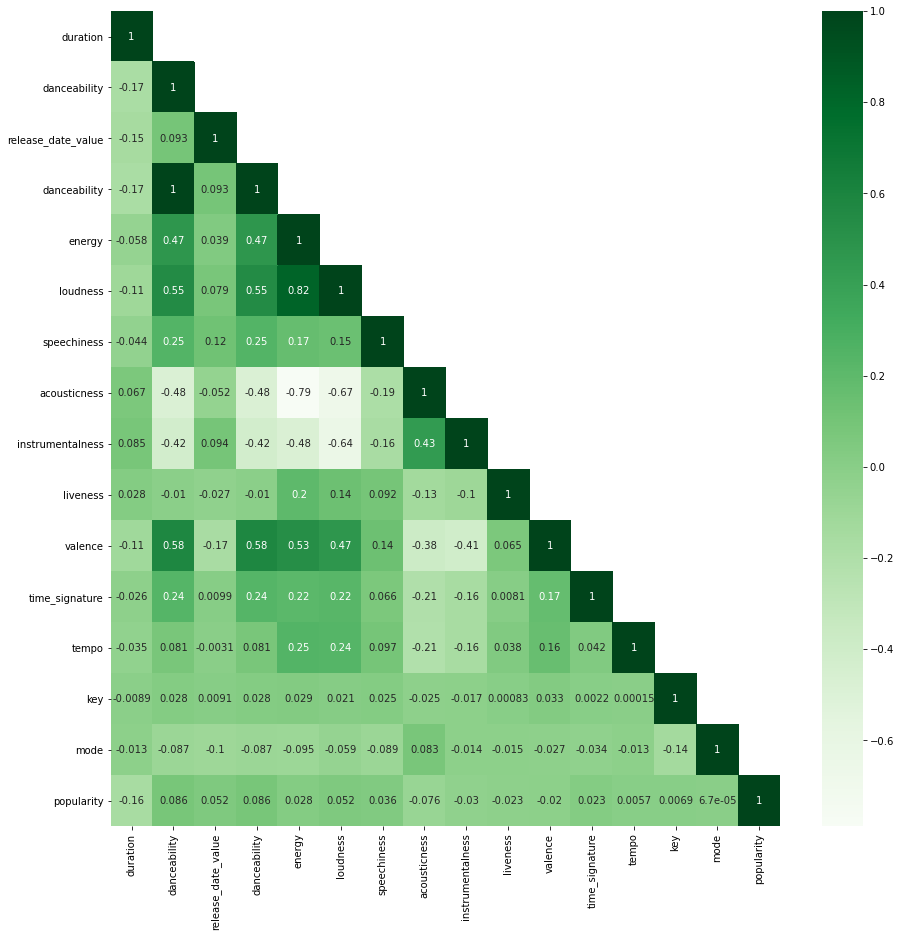

In [128]:
plt.figure(figsize=(15,15))

corr = allsongs[["duration","danceability", "release_date_value", "danceability", "energy", "loudness","speechiness", "acousticness",
           "instrumentalness","liveness", "valence","time_signature","tempo","key","mode","popularity"]].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask, 1)] = True
sns.heatmap(corr, mask=mask, annot=True, cmap="Greens")


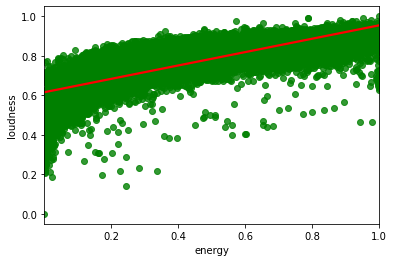

In [113]:
sns.regplot(x=allsongs["energy"], y=allsongs["loudness"], data=allsongs, scatter_kws = {"color": "g"}, line_kws = {"color": "red"})

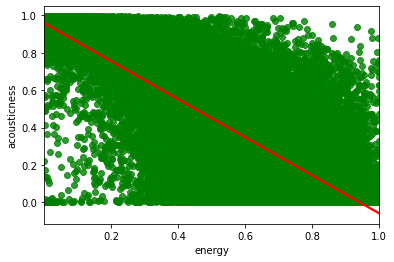

In [129]:
sns.regplot(x=allsongs["energy"], y=allsongs["acousticness"], data=allsongs, scatter_kws = {"color": "g"}, line_kws = {"color": "red"})

NameError: name 'show_values_on_bars' is not defined

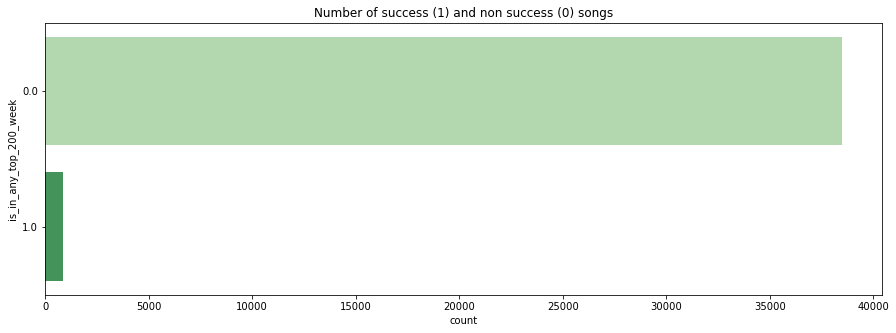

In [84]:
plt.figure(1 , figsize = (15 , 5))
ax = sns.countplot(y = 'is_in_any_top_200_week', data = allsongs, palette="Greens")
ax.set_title('Number of success (1) and non success (0) songs')
show_values_on_bars(ax, "h", 10)
plt.show()

NameError: name 'show_values_on_bars' is not defined

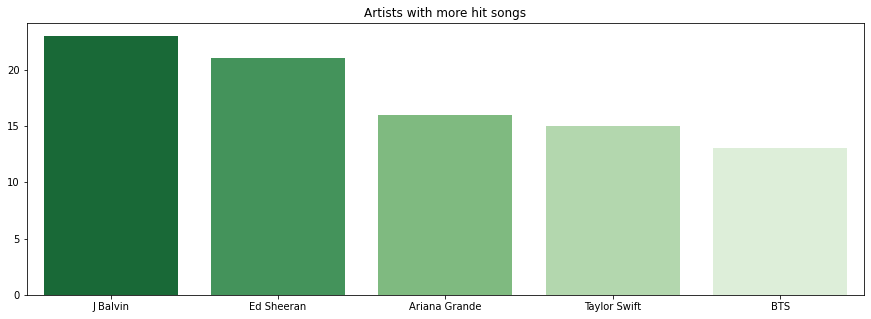

In [90]:
# Get only hit songs
hits_df = allsongs[allsongs["is_in_any_top_200_week"] == 1]
top_artists = hits_df['artist'].value_counts()[:5]
name = top_artists.index.tolist()
amount = top_artists.values.tolist()
plt.figure(1 , figsize = (15, 5))
ax = sns.barplot(x = name, y = amount, palette="Greens_r")
ax.set_title('Artists with more hit songs')
show_values_on_bars(ax, "v", 10)
plt.show()

In [117]:
allsongs.corr()

,popularity,duration,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,romance,roots,sleep,soul,toplists,travel,wellness,workout,number_of_playlists,release_date_value
popularity,1.000000,-0.159091,0.085539,0.027797,0.006930,0.052168,0.000067,0.035949,-0.075968,-0.029838,...,0.079112,-0.106842,0.058508,0.000751,0.127748,-0.023673,0.065762,0.098242,0.184958,0.051721
duration,-0.159091,1.000000,-0.171129,-0.057596,-0.008896,-0.106481,-0.013474,-0.044265,0.066722,0.085291,...,-0.022870,-0.034551,-0.036596,0.000368,-0.046802,-0.026177,-0.048047,-0.056004,-0.049724,-0.146115
danceability,0.085539,-0.171129,1.000000,0.472500,0.028361,0.549533,-0.087134,0.250898,-0.476923,-0.419967,...,-0.015902,-0.080817,-0.194363,0.036717,0.069082,-0.002253,-0.243325,0.016743,-0.131345,0.092569
energy,0.027797,-0.057596,0.472500,1.000000,0.029337,0.821510,-0.094612,0.168128,-0.788878,-0.477728,...,-0.062676,-0.157049,-0.138114,0.031043,0.063545,-0.027465,-0.217380,0.167478,-0.084425,0.038765
key,0.006930,-0.008896,0.028361,0.029337,1.000000,0.020618,-0.137663,0.025236,-0.025313,-0.016894,...,-0.004428,-0.007397,-0.003013,0.005336,0.010668,-0.001361,-0.019178,-0.002609,-0.000521,0.009075
loudness,0.052168,-0.106481,0.549533,0.821510,0.020618,1.000000,-0.059027,0.146569,-0.673374,-0.641563,...,0.043254,-0.009769,-0.263060,0.013807,0.067499,-0.005027,-0.284932,0.108628,-0.155521,0.079394
mode,0.000067,-0.013474,-0.087134,-0.094612,-0.137663,-0.059027,1.000000,-0.088899,0.083429,-0.014069,...,0.047191,0.098089,-0.000023,-0.001061,-0.035927,-0.012343,0.037292,-0.018472,0.011752,-0.101695
speechiness,0.035949,-0.044265,0.250898,0.168128,0.025236,0.146569,-0.088899,1.000000,-0.186172,-0.164661,...,-0.052311,-0.148245,-0.000437,-0.017416,0.047982,-0.005178,-0.059234,0.046898,-0.088127,0.122081
acousticness,-0.075968,0.066722,-0.476923,-0.788878,-0.025313,-0.673374,0.083429,-0.186172,1.000000,0.434654,...,0.027746,0.181067,0.090088,-0.027581,-0.078244,0.039481,0.187118,-0.163694,0.052884,-0.051706
instrumentalness,-0.029838,0.085291,-0.419967,-0.477728,-0.016894,-0.641563,-0.014069,-0.164661,0.434654,1.000000,...,-0.101467,-0.104485,0.183368,-0.045686,-0.051440,0.020945,0.260960,-0.038933,0.210609,0.093595


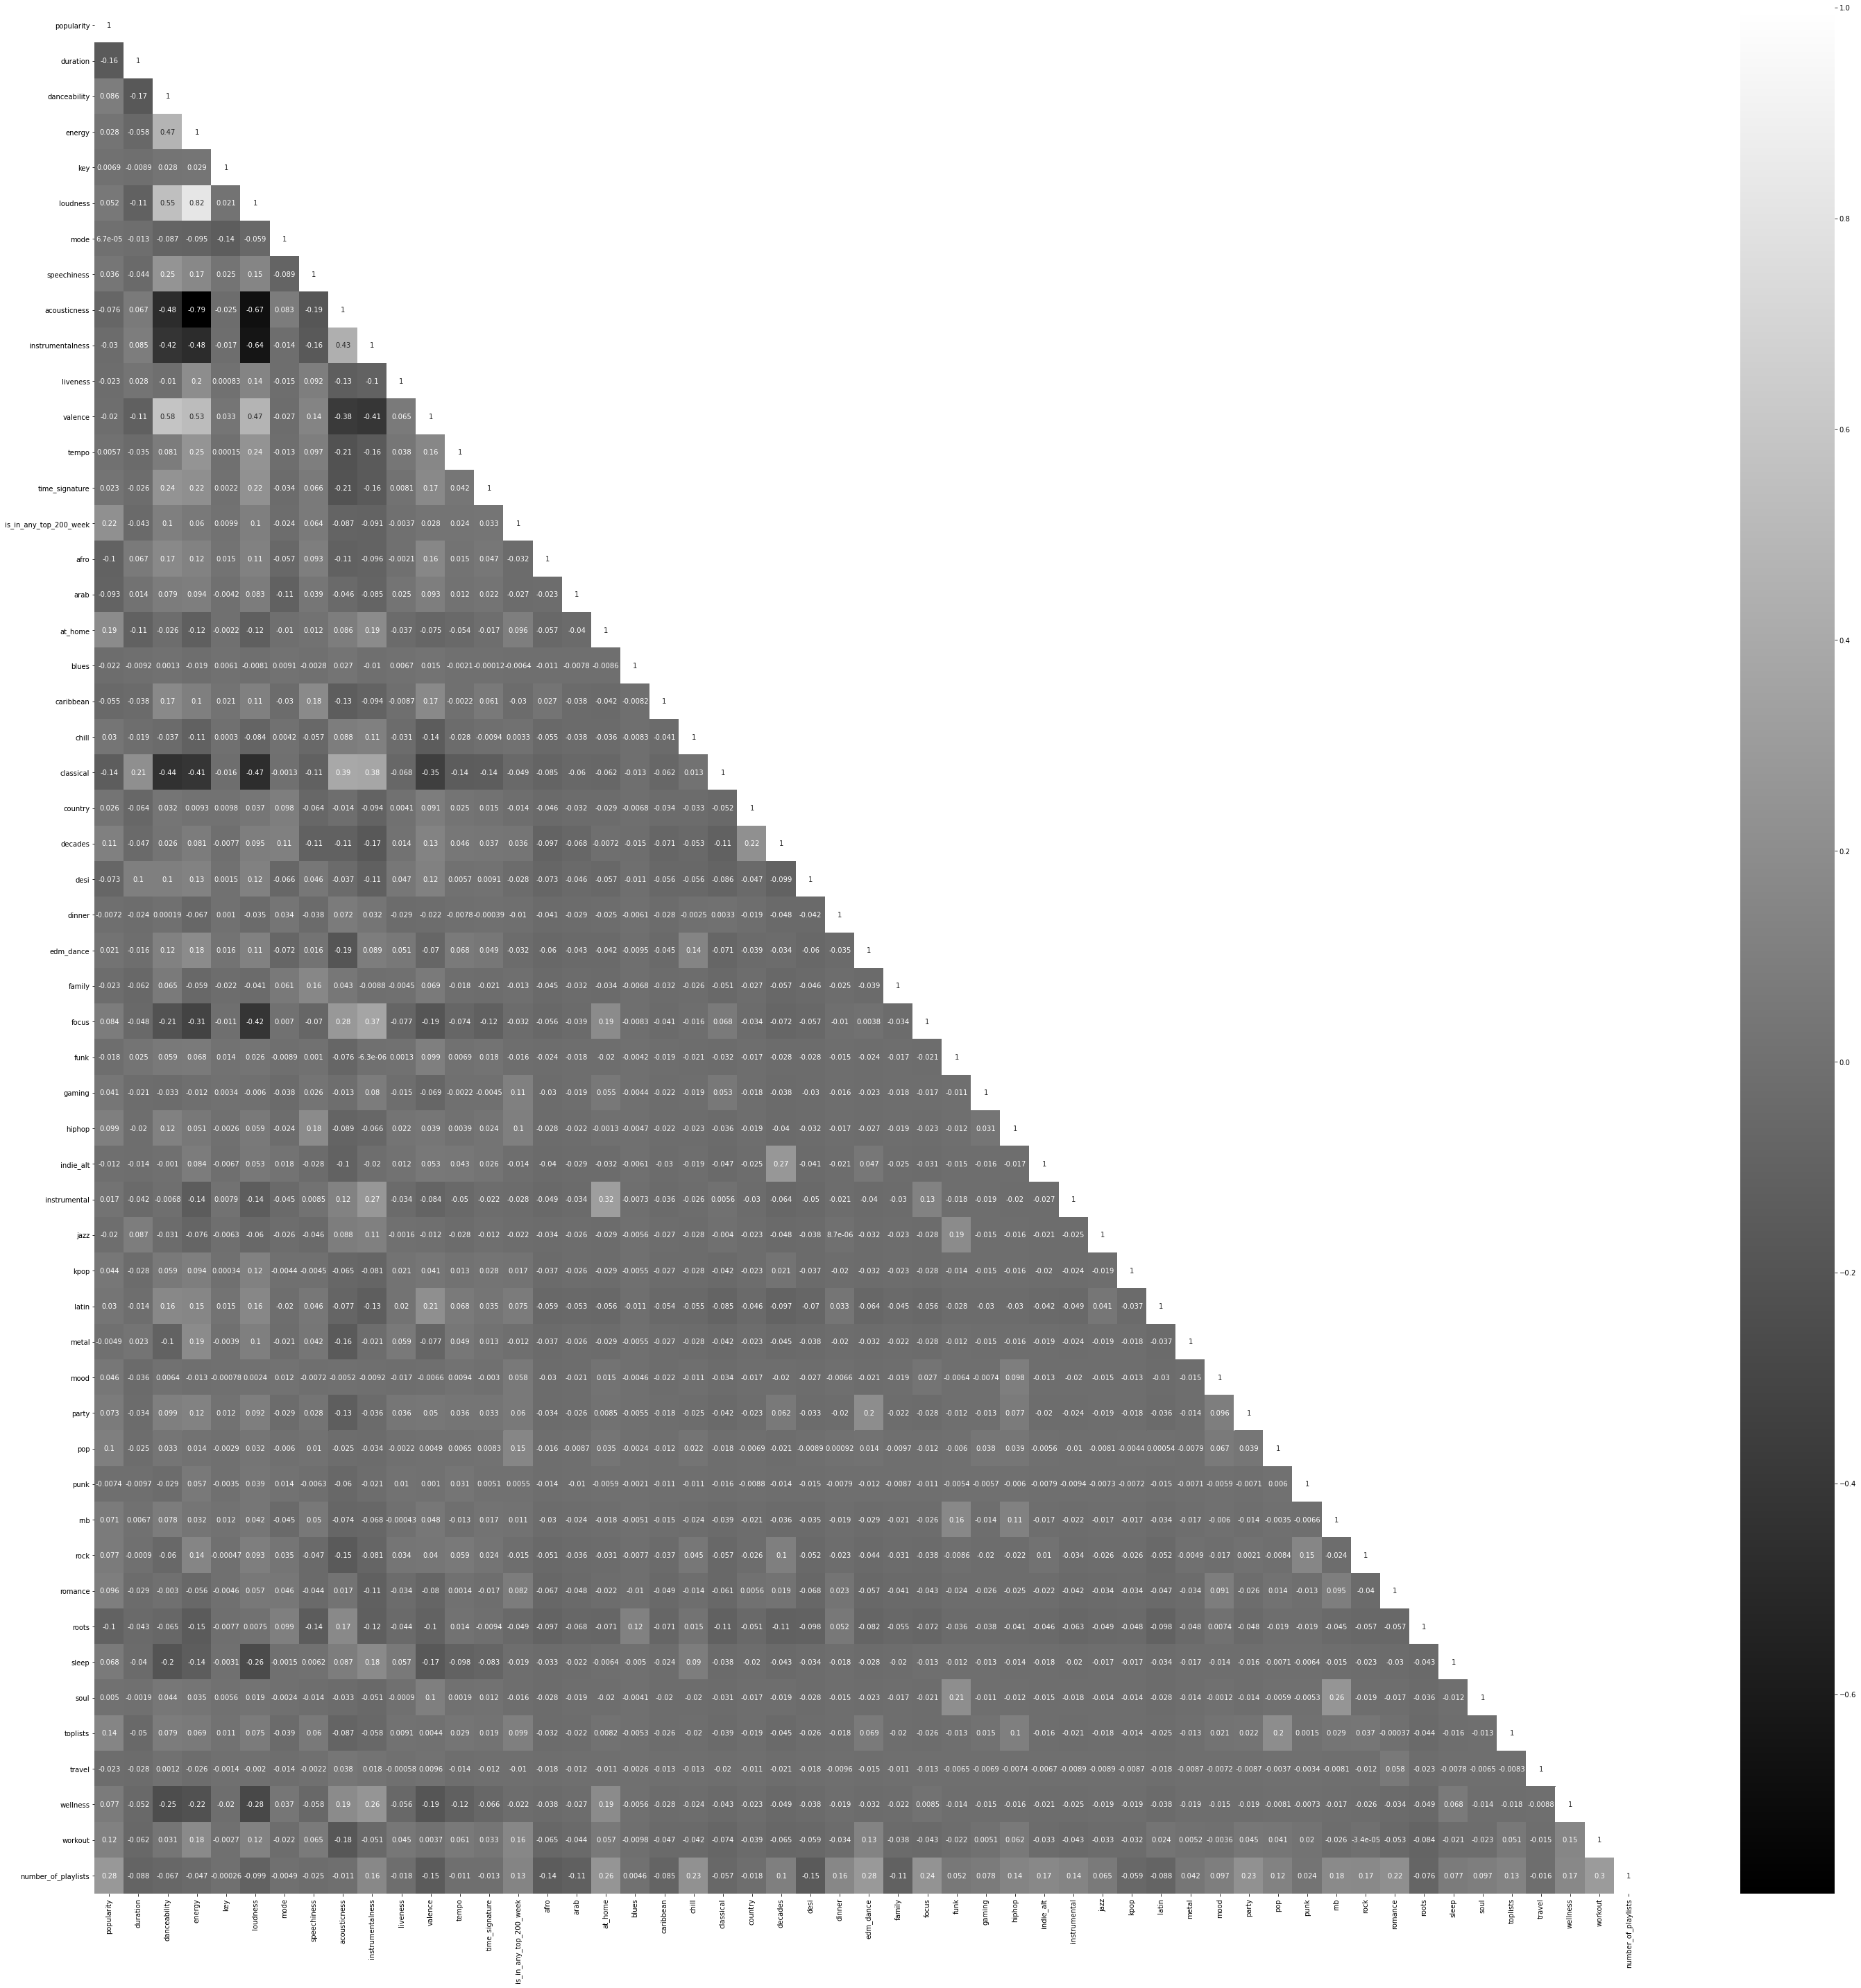

In [93]:
plt.figure(figsize=(50,50))
corr = prueba.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask, 1)] = True
sns.heatmap(corr, mask=mask, annot=True, cmap="binary_r")
